In [1]:
#importando bibliotecas
from sklearn.decomposition import NMF
#importando pandas para o dataset
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#biblioteca do kmeans
from sklearn.cluster import KMeans

from IPython.display import Image
from pathlib import Path


config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIR_BASE = DIR_PREFIXO / "Projeto_PA" / "dataset_modificado"
DIR_NMF = DIRETORIO_PRINCIPAL / "NMF"
DIR_KMEANS = DIRETORIO_PRINCIPAL / "KMeansRandom"

#DIRETORIO_PRINCIPAL = Path(r"D:\Projeto_PA")


In [2]:
#leitura do arquivo

#dados_mapa = pd.read_csv (DIRETORIO_PRINCIPAL / "padrao_doenca" / "pacientes_aceitos_apos_tratamento_dados.csv", sep=";", encoding="Latin1")
#dados_mapa = pd.read_csv(DIRETORIO_PRINCIPAL / "padrao_doenca" / "classificados_por_padroes_de_doenca_estatistica.csv",sep=';')

dados_mapa = pd.read_csv(DIR_BASE / "pacientes_completos_tratados.csv",sep=';', encoding="Latin1")

#dados_mapa = pd.read_csv(DIRETORIO_DATASET / "dataset_modificado" / "pacientes_com_todas_medidas.csv",sep=';')
#dados_mapa = pd.read_csv(DIRETORIO_DATASET / "dataset_modificado" / "pacientes_para_NMF.csv",sep=';', encoding="Latin1")
#dados_mapa = DIRETORIO_PRINCIPAL / "padrao_doenca" / 'idosos_classificados_por_padroes_de_doenca_estatistica.csv', 

#data = pd.read_csv(r"D:\Projeto_PA\dataset_modificado\pacientes_aceitos.csv",sep=';', encoding="Latin1")
# D:\Projeto_PA\Projeto_PA_validado\padrao_doenca


#dados_mapa = dados_mapa.drop('Unnamed: 0',axis=1)

In [3]:
#verificar nome das colunas
# print (list(dados_mapa.columns))

## Preparação do Dataset que será entrada do K-Means/NMF

In [4]:
# Separar os campos que serão utilizados
dados_mapa_original = dados_mapa

medidas = pd.concat((dados_mapa.loc[:, "numero_identificacao"], dados_mapa.loc[:, "sist 9:00": "diast 8:45"]), axis=1)
# data = pd.concat((data.loc[:, "numero_identificacao"], data.loc[:, "idade"], data.loc[:, "sist 9:00": "diast 8:45"]), axis=1)

# Dataset com o número de Identificação e as medidas de Sistolica e Diastólica
medidas

#dados_mapa = dados_mapa.drop(['data_nascimento','genero','idade','peso','altura','data_exame', 'whitecoat'],axis=1)


,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,4,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,5,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,6,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,8,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19258,21786,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19259,21787,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19260,21788,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19261,21792,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [5]:
#dados_mapa.loc[:,'Normotenso':].columns

In [6]:
#estatistica = pd.concat((dados_mapa.loc[:, "numero_identificacao"], dados_mapa.loc[:, "Media Sistolica em 24h": "DP Diastolica em 24h"]), axis=1)
#estatistica = estatistica.drop(['Media Sistolica Vespertina','Media Diastolica Vespertina','Media Sistolica Matutina',
#                               'Media Diastolica Matutina','Media Diastolica Diurna','Media Sistolica Diurna'],axis=1)

estatistica = dados_mapa.loc[:, "AUC Sistolica em 24h": "AUC PP Nighttime"]
estatistica = pd.concat([dados_mapa.loc[:, "numero_identificacao"], estatistica], axis=1)
estatistica

estatistica_sem_id = estatistica.drop(['numero_identificacao'],axis=1)

## Matriz de Correlação das Medidas

In [7]:
# Plotagem da Matriz de Correlação das variáveis Sistólica e Diastólica

#sistolicas = dados_mapa.loc[:, "sist 9:00": "sist 8:45"]
#correlacao_sist = sistolicas.corr(method='pearson')
#diastolicas = dados_mapa.loc[:, "diast 9:00": "diast 8:45"]
#correlacao_diast = diastolicas.corr(method='pearson')
#
#
#def grafico_correlacao(corr):
#    
#    sns.set_theme(style="white")
#
#    # Generate a mask for the upper triangle
#    mask = np.triu(np.ones_like(corr, dtype=bool))
#
#    # Set up the matplotlib figure
#    f, ax = plt.subplots(figsize=(20, 18))
#
#    # Generate a custom diverging colormap
#    cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
#    # Draw the heatmap with the mask and correct aspect ratio
#    sns.heatmap(corr, vmin=0, vmax=1, mask=mask, cmap=cmap,  center=0,
#                square=True, linewidths=.2, cbar_kws={"shrink": .8})
#    
#    plt.show()
#
#grafico_correlacao(correlacao_sist)
#grafico_correlacao(correlacao_diast)

## Tratamento de nulos

In [8]:
#verificar a quantidade de nulos em cada linha

medidas.isnull().sum()

numero_identificacao    0
sist 9:00               0
sist 9:15               0
sist 9:30               0
sist 9:45               0
                       ..
diast 7:45              0
diast 8:00              0
diast 8:15              0
diast 8:30              0
diast 8:45              0
Length: 165, dtype: int64

In [9]:
#trocar Nan por 0
medidas_sem_nan = medidas.fillna(0)

In [10]:
#verificando se existe nulos
medidas_sem_nan.isnull().sum()

numero_identificacao    0
sist 9:00               0
sist 9:15               0
sist 9:30               0
sist 9:45               0
                       ..
diast 7:45              0
diast 8:00              0
diast 8:15              0
diast 8:30              0
diast 8:45              0
Length: 165, dtype: int64

## K-means - identifica o melhor numero de componentes para aplicar o NMF

In [11]:
#Funções para calcular o melhor número de cluster gerado pelo Dataset


def calculate_wcss(medidas_sem_nan):
    """
    Calcula a soma dos quadrados intra-clusters para 19
    quantidades de clusters, iniciando com o mínimo de 2 clusters
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do K-Means

    
    Returns
    -------
    wcss : lista contendo os valores de soma de quadrados intra-cluster
    """
    
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n, random_state=10)
        kmeans.fit(X=medidas_sem_nan)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para 19 calculadas 
    com `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista
        lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [12]:
#  Excluindo a variavel numero de identificação para entrada do NMF
medidas_sem_nan = medidas
dados_sem_id = medidas_sem_nan.drop(['numero_identificacao'],axis=1)

In [13]:

estatistica_sem_id = estatistica.drop(['numero_identificacao'],axis=1)

In [14]:
estatistica_sem_id

,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime
0,9545.5,4902.0,3748.0,841.5
1,8586.5,5034.5,2915.0,606.0
2,10674.0,6154.0,3721.0,751.5
3,10679.5,6420.5,3642.0,602.5
4,9141.5,6118.0,2405.0,566.0
...,...,...,...,...
19258,12224.5,9265.0,2439.0,474.5
19259,10970.0,6819.0,3319.0,738.0
19260,9245.0,4935.5,3556.0,713.5
19261,8989.5,5660.0,2815.5,460.0


In [15]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
sum_of_squares = calculate_wcss(dados_sem_id)
numero_otimo_cluster = optimal_number_of_clusters(sum_of_squares)
print (numero_otimo_cluster)

7


In [16]:
teste = estatistica.fillna(-1)
#teste[teste['Media Sistolica Vespertina'] == -1]
colunas =list( teste.columns)
colunas

['numero_identificacao',
 'AUC Sistolica em 24h',
 'AUC Diastolica em 24h',
 'AUC PP Daytime',
 'AUC PP Nighttime']

In [17]:
#teste[teste['Media Sistolica Nighttime']==-1]

In [18]:
coluna = 'Media Sistolica Nighttime','Media Diastolica Nighttime'
for coluna in colunas:
    linha = teste.loc[:,coluna].unique()
    linha.sort()
    print(linha,coluna)

[    4     5     6 ... 21788 21792 21793] numero_identificacao
[ 6903.   7089.5  7135.5 ... 15047.5 15107.5 15230. ] AUC Sistolica em 24h
[ 3651.5  3674.5  3697.5 ... 10413.  10530.5 11134.5] AUC Diastolica em 24h
[1641.5 1658.5 1698.5 ... 6346.5 6836.  7329.5] AUC PP Daytime
[ 281.5  301.   301.5 ... 1395.  1402.5 1418.5] AUC PP Nighttime


In [19]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
estatistica_sem_id = estatistica_sem_id.fillna(0)
sum_of_squares_estatistica = calculate_wcss(estatistica_sem_id)
numero_otimo_cluster_estatistica = optimal_number_of_clusters(sum_of_squares_estatistica)
print (numero_otimo_cluster_estatistica)

7


In [20]:
#   convertendo os dados para a clusterização
#   converte de DataFrame para Array por causa do K-Means
X = np.array(dados_sem_id)

In [21]:
#   convertendo os dados para a clusterização
#   converte de DataFrame para Array por causa do K-Means
estatistica_forma = np.array(estatistica_sem_id)

In [22]:
#habilitando o kmeans com numero otimo de grupos (calculado na etapa anterior)
kmeans = KMeans(n_clusters=numero_otimo_cluster, random_state=10).fit(X)

In [23]:
#habilitando o kmeans com numero otimo de grupos (calculado na etapa anterior)
kmeans_estatistica = KMeans(n_clusters=numero_otimo_cluster_estatistica, random_state=10).fit(estatistica_forma)

In [24]:
# Gera os números dos grupos 
# 
grupos = kmeans.fit_predict(X)

In [25]:
# Gera os números dos grupos 
# 
grupos_estatistica = kmeans_estatistica.fit_predict(estatistica_forma)

In [26]:
#  Inclui o grupo de cada paciente no dataset de entrada
mapa_grupos = dados_mapa.loc[:,:'data_exame']
mapa_grupos['grupo'] = grupos
mapa_grupos = pd.concat([mapa_grupos,dados_mapa.loc[:,'sist 9:00':'Picos Diastolica']],axis=1)
mapa_grupos

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,4,105.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,4,103.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,1,147.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,1,140.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,6,113.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19258,21786,1972-11-25,1,47.0,75.0,165,27.5,2020-09-10 16:03:08,0,163.0,...,152.0,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60
19259,21787,1970-10-19,1,49.0,90.0,183,26.9,2020-09-10 16:21:02,5,114.0,...,136.0,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27
19260,21788,1985-03-15,0,35.0,93.0,167,33.3,2020-09-10 16:44:53,4,107.0,...,112.0,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26
19261,21792,1952-04-21,0,68.0,64.0,160,25.0,2020-09-10 17:25:50,6,94.0,...,109.5,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13


## n Grupos de pacientes separados pelo Kmeans, sendo n=número ótimo de clusters

In [27]:
#  Inclui o grupo de cada paciente no dataset de entrada
mapa_grupos_estatistica = dados_mapa.loc[:,:'data_exame']
mapa_grupos_estatistica['grupo'] = grupos_estatistica
mapa_grupos_estatistica = pd.concat([mapa_grupos_estatistica,dados_mapa.loc[:,'sist 9:00':'Picos Diastolica']],axis=1)
mapa_grupos_estatistica

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,4,105.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,3,103.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,2,147.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,2,140.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,1,113.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19258,21786,1972-11-25,1,47.0,75.0,165,27.5,2020-09-10 16:03:08,6,163.0,...,152.0,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60
19259,21787,1970-10-19,1,49.0,90.0,183,26.9,2020-09-10 16:21:02,6,114.0,...,136.0,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27
19260,21788,1985-03-15,0,35.0,93.0,167,33.3,2020-09-10 16:44:53,4,107.0,...,112.0,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26
19261,21792,1952-04-21,0,68.0,64.0,160,25.0,2020-09-10 17:25:50,3,94.0,...,109.5,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13


In [28]:
#grupo 0 tem 4968 pacientes
#mapa_grupos[mapa_grupos['grupo']==0]

In [29]:
#grupo 1 tem 2063 pacientes
#mapa_grupos[mapa_grupos['grupo']==1]

In [30]:
#grupo 2 tem 1963 pacientes
#mapa_grupos[mapa_grupos['grupo']==2]

In [31]:
#grupo 3 tem 3370 pacientes
#mapa_grupos[mapa_grupos['grupo']==3]

In [32]:
#grupo 4 tem 2788 pacientes
#mapa_grupos[mapa_grupos['grupo']==4]

In [33]:
#grupo 5 tem 3397 pacientes
#mapa_grupos[mapa_grupos['grupo']==5]

In [34]:
#grupo 6 tem 2391 pacientes
#mapa_grupos[mapa_grupos['grupo']==6]

In [35]:
#grupo 7 tem 2391 pacientes
#mapa_grupos[mapa_grupos['grupo']==7]

In [36]:
#grupo 8 tem 2391 pacientes
#mapa_grupos[mapa_grupos['grupo']==8]

## Nonnegative Matrix Factorization 

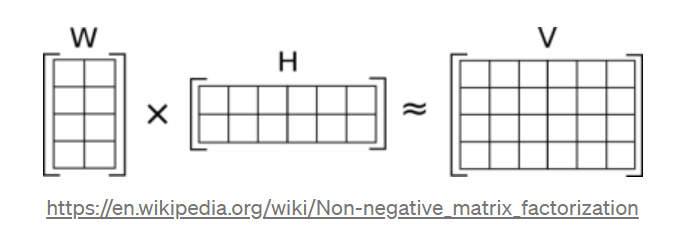

In [37]:
Image(filename=r"C:\Users\marta\projeto_pa\NMF\imgs\Imagem1.png")

### O objetivo no NMF é decompor a matriz (V) pelo produto escalar de dois arrays W e H. As dimensões dos arrays são definidas pelas dimensões de V (valores do paciente) e pelo número de componentes que definimos para o algoritmo. Se V tem n linhas e x colunas e queremos decompor em k componentes, então W tem n linhas e k colunas e H tem k linhas e x colunas.

In [38]:
#aplicando o NMF com numero de componente = numero_otimo_cluster calculado pelo K-means
model = NMF(n_components=numero_otimo_cluster,init='random',random_state=0)

In [39]:

#aplicando o NMF com numero de componente = numero_otimo_cluster calculado pelo K-means
model_estatistica = NMF(n_components=numero_otimo_cluster_estatistica,init='random',random_state=0)

In [40]:
#tirando a variavel numero de identificação 
#entrada_NMF = dados_mapa.loc[:, 'sist 9:00':'diast 8:45'] 

In [41]:
# entrada_NMF
dados_sem_id

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,116.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19258,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19259,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19260,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,104.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19261,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [42]:
#   aplicando o modelo NMF
model.fit(dados_sem_id)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [43]:
estatistica_sem_id

,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime
0,9545.5,4902.0,3748.0,841.5
1,8586.5,5034.5,2915.0,606.0
2,10674.0,6154.0,3721.0,751.5
3,10679.5,6420.5,3642.0,602.5
4,9141.5,6118.0,2405.0,566.0
...,...,...,...,...
19258,12224.5,9265.0,2439.0,474.5
19259,10970.0,6819.0,3319.0,738.0
19260,9245.0,4935.5,3556.0,713.5
19261,8989.5,5660.0,2815.5,460.0


In [44]:

#   aplicando o modelo NMF
model_estatistica.fit(estatistica_sem_id)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [45]:
#  'Grupo x' sendo x = numero_otimo_cluster

#Criando H como resultado do produto escalar das matrizes
H = pd.DataFrame(np.round(model.components_,2), columns=dados_sem_id.columns)

H.index = [f'Grupo {i + 1}' for i in range(numero_otimo_cluster)]



In [46]:
estatistica
#  'Grupo x' sendo x = numero_otimo_cluster

#Criando H como resultado do produto escalar das matrizes
H_estatistica = pd.DataFrame(np.round(model_estatistica.components_,2), columns=estatistica_sem_id.columns)

H_estatistica.index = [f'Grupo {i + 1}' for i in range(numero_otimo_cluster_estatistica)]

In [47]:
#Foi criado "numero_otimo_cluster" grupos
H

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
Grupo 1,6.96,7.30,7.52,7.74,7.76,7.89,7.81,7.83,7.70,7.62,...,0.88,1.04,1.17,1.40,1.58,1.80,1.99,2.19,2.34,2.58
Grupo 2,2.13,1.74,1.38,1.08,0.78,0.42,0.24,0.00,0.00,0.00,...,3.85,3.81,3.79,3.74,3.73,3.63,3.66,3.64,3.59,3.46
Grupo 3,0.77,0.58,0.55,0.58,0.78,1.14,1.49,1.81,2.09,2.42,...,5.58,5.21,4.83,4.18,3.60,3.10,2.45,1.98,1.60,1.22
Grupo 4,0.58,0.56,0.75,1.15,1.65,2.15,2.83,3.40,3.98,4.46,...,0.82,0.92,1.00,1.00,0.89,0.67,0.48,0.30,0.22,0.11
Grupo 5,8.61,8.23,7.78,7.28,6.74,6.09,5.41,4.71,4.20,3.57,...,3.28,3.77,4.19,4.65,4.96,5.26,5.39,5.38,5.35,5.28
Grupo 6,3.25,3.81,4.21,4.43,4.74,4.85,4.93,5.00,4.90,4.79,...,2.21,2.26,2.34,2.49,2.85,3.23,3.66,4.07,4.39,4.72
Grupo 7,4.38,4.40,4.33,4.02,3.75,3.48,3.23,3.07,2.87,2.78,...,0.36,0.12,0.00,0.00,0.00,0.02,0.17,0.30,0.38,0.44


In [48]:
#Calcula a soma total por grupos
lista = []
for k in range(0,numero_otimo_cluster):
    sum_ = 0
    for i in H.columns:
        sum_ = sum_ + H.iloc[[k]][i]
    lista.append(sum_)

In [49]:
lista[0]
np.sum(H.iloc[0,:].values)

482.54999999999995

In [50]:
#o grupo com maior soma total é Grupo 6
lista

[Grupo 1    482.55
 dtype: float64, Grupo 2    507.14
 dtype: float64, Grupo 3    457.69
 dtype: float64, Grupo 4    549.78
 dtype: float64, Grupo 5    519.23
 dtype: float64, Grupo 6    641.51
 dtype: float64, Grupo 7    571.35
 dtype: float64]

In [51]:

#Calcula a soma total por grupos
lista_estatistica = []
for k in range(0,numero_otimo_cluster_estatistica):
    soma = 0
    for i in H_estatistica.columns:
        soma = soma + H_estatistica.iloc[[k]][i]
    lista_estatistica.append(soma)

##### O grupo 5 é o que tem a maior soma total dos valores entre sist e diast, mesmo que grupo 2 tenha os maiores valores por variavel (sist) ele que tem a menor somar total


In [52]:
#Salvar a planilha
#H.to_excel('H.xlsx')

H.to_csv(DIR_NMF / "H.csv", sep=";", encoding="Latin1")


#H.to_csv(r"C:\Users\marta\projeto_pa\NMF\H.csv", sep=";", encoding="Latin1")


In [53]:
#Criar gráficos para apresentar as diferenças entre os grupos. 
    
#################################################################################################
#Image(filename=r"D:\Projeto_PA\dataset_modificado\imgs\Grafico1.png")
#############################################################################################

In [54]:
dados_sem_id
#entrada_NMF

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,111.0,116.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19258,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19259,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19260,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,128.0,104.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19261,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [55]:
#Gera o W com numero do paciente, para verificar a importancia que cada paciente tem em cada grupo
#W = pd.DataFrame(np.round(model.transform(dados_sem_id),2), columns=H.index)
#W.index = dados_mapa["numero_identificacao"]
W = pd.DataFrame(np.round(model.transform(dados_sem_id),3), columns=H.index)

#  Incluir o numero_identificacao na matriz W
numero_id = dados_mapa["numero_identificacao"]
W = pd.concat([numero_id,W],axis=1)

#exemplo o paciente 5 não tem muita influencia no Grupo 7, está presenta mais no Grupo 1
#print(len(dados_mapa), len(dados_mapa_original))
W

,numero_identificacao,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,4,6.386,1.922,3.051,6.112,1.874,2.462,5.663
1,5,6.924,5.084,5.327,2.827,2.603,1.232,3.046
2,6,8.741,5.277,2.482,2.722,3.775,3.567,5.755
3,7,9.626,4.566,2.904,3.050,4.618,4.209,3.966
4,8,6.902,6.005,3.291,4.815,3.057,3.549,1.860
...,...,...,...,...,...,...,...,...
19258,21786,8.544,9.905,6.390,5.042,5.879,5.794,0.270
19259,21787,8.778,4.566,5.637,5.553,2.689,4.261,2.980
19260,21788,8.192,2.842,2.851,4.820,1.831,2.534,4.239
19261,21792,5.165,5.664,2.738,5.614,4.257,2.157,2.648


In [56]:
 

#Gera o W com numero do paciente, para verificar a importancia que cada paciente tem em cada grupo
#W = pd.DataFrame(np.round(model.transform(dados_sem_id),2), columns=H.index)
#W.index = dados_mapa["numero_identificacao"]
W_estatistica = pd.DataFrame(np.round(model_estatistica.transform(estatistica_sem_id),3), columns=H_estatistica.index)

#  Incluir o numero_identificacao na matriz W
numero_id_estatistica = dados_mapa["numero_identificacao"]
W_estatistica = pd.concat([numero_id_estatistica,W_estatistica],axis=1)

#exemplo o paciente 5 não tem muita influencia no Grupo 7, está presenta mais no Grupo 1
#print(len(dados_mapa), len(dados_mapa_original))
W_estatistica

,numero_identificacao,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,4,58.855,112.138,15.619,0.048,0.000,6.398,0.0
1,5,79.177,94.866,8.978,2.506,0.000,0.000,0.0
2,6,92.344,121.342,11.368,2.403,0.000,1.070,0.0
3,7,95.025,127.016,7.255,3.004,0.000,0.605,0.0
4,8,125.514,74.374,5.218,7.432,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...
19258,21786,207.903,75.774,0.000,17.190,4.962,0.000,0.0
19259,21787,125.220,105.184,9.204,5.396,0.000,0.000,0.0
19260,21788,60.033,112.090,12.298,0.380,0.000,5.340,0.0
19261,21792,94.507,98.996,4.094,3.635,0.000,0.000,0.0


#### No vetor W é possivel identificar a importancia dos dados dos pacientes para criação do grupo, como pode ser visto o Paciente 4 que não tem relação com o grupo 1, mas participar do grupo 2 e 3.

In [57]:
#W.to_excel('W.xlsx')
W.to_csv(DIR_NMF / "W.csv", sep=";", encoding="Latin1")


#W.to_csv(r"C:\Users\marta\projeto_pa\NMF\W.csv", sep=";", encoding="Latin1")


In [58]:
# Calcula a relevância de cada linha comparando os valores de cada grupo totalizando 1

def relevancia_comparada(matriz_W):
    for linha in range(len(matriz_W)):
        soma_grupos = np.sum(matriz_W.iloc[linha,1:])
        for coluna in range(1,len(matriz_W.iloc[linha,1:]) + 1):
            matriz_W.iloc[linha,coluna] = matriz_W.iloc[linha,coluna]/soma_grupos
    return matriz_W

In [59]:
valores_relevancia = relevancia_comparada(W)

In [60]:

valores_relevancia_estatistica = relevancia_comparada(W_estatistica)


In [61]:
valores_relevancia_estatistica

,numero_identificacao,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,4,0.304857,0.580851,0.080903,0.000249,0.000000,0.033140,0.0
1,5,0.426768,0.511333,0.048392,0.013507,0.000000,0.000000,0.0
2,6,0.404084,0.530974,0.049745,0.010515,0.000000,0.004682,0.0
3,7,0.407999,0.545355,0.031150,0.012898,0.000000,0.002598,0.0
4,8,0.590549,0.349933,0.024551,0.034968,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
19258,21786,0.679801,0.247766,0.000000,0.056208,0.016225,0.000000,0.0
19259,21787,0.511094,0.429315,0.037567,0.022024,0.000000,0.000000,0.0
19260,21788,0.315729,0.589510,0.064678,0.001999,0.000000,0.028084,0.0
19261,21792,0.469642,0.491950,0.020345,0.018064,0.000000,0.000000,0.0


In [62]:

#função para padronizar os grupos
#def padronizar_grupos(colunas_de_W):
#    lista_final = []
#    
#    for itm in colunas_de_W:
#        rst = float(float(itm)/float(sum(colunas_de_W)))
#        lista_final.append(rst)
#    
#    return lista_final
#
##criando o dataframe W padronizado
#W_padronizado = pd.DataFrame()
#
#for col in W.columns:
#    W_padronizado[col] = padronizar_grupos(W[col])
#
#W_padronizado['numero_identificacao'] = dados_mapa['numero_identificacao']
#
## Grava W_padronizado
#W_padronizado.to_csv(DIR_NMF / "W_padronizado.csv", sep=";", encoding="Latin1")

#W_padronizado.to_csv(r"C:\Users\marta\projeto_pa\NMF\W_padronizado.csv", sep=";", encoding="Latin1")

In [63]:
#Lista os maiores valores de cada grupo
#mostra_maiores_valores = []
#
#for col in W.columns:
#    valor = list(W_padronizado[W_padronizado[col] == max(W_padronizado[col])]['numero_identificacao'])[0]
#    mostra_maiores_valores.append(valor)
#
#W_padronizado[W_padronizado['numero_identificacao'].isin(mostra_maiores_valores)]

In [64]:
dados_mapa_original.head()


,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,105.0,108.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,103.0,114.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,147.0,148.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,140.0,139.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,113.0,110.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11


In [65]:
# Gera dataset resultante do NMF com dados cadastrais de cada paciente, medidas e seu peso em cada grupo

todos_os_dados = metadados = dados_mapa_original.copy()
metadados.index = metadados["numero_identificacao"]

mapa_cadastro_grupos = pd.concat([metadados["genero"] , metadados["idade"], 
                         metadados["peso"], metadados["data_exame"],
                        W], axis=1)

saida_NMF = pd.concat ([metadados["genero"] , metadados["idade"], 
                         metadados["peso"], metadados["data_exame"], 
                        metadados.loc[:,"sist 9:00": "diast 8:45"],
                        W], axis=1)
#
#mapa_grupos = W.copy()
#
#for coluna in reversed(["genero", "idade", "peso", "data_exame"]):
#    mapa_grupos.insert(0, coluna, metadados[coluna])
#
#mapa_grupos

saida_NMF

,genero,idade,peso,data_exame,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,...,diast 8:30,diast 8:45,numero_identificacao,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,0.232472,0.069967,0.111067,0.222497,0.068220,0.089625,0.206152
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,0.256037,0.187997,0.196983,0.104537,0.096254,0.045557,0.112635
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,0.270460,0.163279,0.076797,0.084223,0.116804,0.110369,0.178069
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,0.292237,0.138620,0.088163,0.092595,0.140199,0.127782,0.120404
4,1.0,94.0,85.0,2018-09-10 12:25:23,105.0,108.0,116.0,104.0,106.0,98.0,...,62.0,51.0,8.0,0.234133,0.203704,0.111639,0.163337,0.103701,0.120391,0.063096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786,1.0,47.0,75.0,2020-09-10 16:03:08,163.0,198.0,172.0,148.0,161.0,156.0,...,119.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21787,1.0,49.0,90.0,2020-09-10 16:21:02,114.0,120.0,164.0,116.0,119.0,126.0,...,106.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21788,0.0,35.0,93.0,2020-09-10 16:44:53,107.0,110.0,103.0,105.0,108.0,111.0,...,64.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21792,0.0,68.0,64.0,2020-09-10 17:25:50,94.0,107.0,112.0,124.0,120.0,94.0,...,69.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:


# Gera dataset resultante do NMF com dados cadastrais de cada paciente, medidas e seu peso em cada grupo

todos_os_dados = metadados = dados_mapa_original.copy()
metadados.index = metadados["numero_identificacao"]

mapa_cadastro_grupos_estatistica = pd.concat([metadados.loc[:,"genero":"DP Diastolica em 24h"],
                        W_estatistica], axis=1)


##  Gera dataset separados por cada grupo contendo todos os dados 

In [67]:
#mapa_grupos[mapa_grupos['grupo'] == 0]['grupo'].unique()
grupo = []
for linha in range(len(valores_relevancia)):
    maximo = max(valores_relevancia.iloc[linha,1:])
    for coluna in range(1, len(valores_relevancia.iloc[linha,1:]) + 1):
        if valores_relevancia.iloc[linha,coluna] == maximo:
            grupo.append(coluna)
            break

In [68]:
valores_relevancia_estatistica

,numero_identificacao,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,4,0.304857,0.580851,0.080903,0.000249,0.000000,0.033140,0.0
1,5,0.426768,0.511333,0.048392,0.013507,0.000000,0.000000,0.0
2,6,0.404084,0.530974,0.049745,0.010515,0.000000,0.004682,0.0
3,7,0.407999,0.545355,0.031150,0.012898,0.000000,0.002598,0.0
4,8,0.590549,0.349933,0.024551,0.034968,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
19258,21786,0.679801,0.247766,0.000000,0.056208,0.016225,0.000000,0.0
19259,21787,0.511094,0.429315,0.037567,0.022024,0.000000,0.000000,0.0
19260,21788,0.315729,0.589510,0.064678,0.001999,0.000000,0.028084,0.0
19261,21792,0.469642,0.491950,0.020345,0.018064,0.000000,0.000000,0.0


In [69]:
#mapa_grupos[mapa_grupos['grupo'] == 0]['grupo'].unique()
grupo_estatistica = []
for linha in range(len(valores_relevancia_estatistica)):
    maximo = max(valores_relevancia_estatistica.iloc[linha,1:])
    for coluna in range(1, len(valores_relevancia_estatistica.iloc[linha,1:]) + 1):
        if valores_relevancia_estatistica.iloc[linha,coluna] == maximo:
            grupo_estatistica.append(coluna)
            break

In [70]:
valores_relevancia_grupo = pd.DataFrame()
valores_relevancia_grupo['numero_identificacao'] = valores_relevancia['numero_identificacao']
valores_relevancia_grupo['grupo'] = grupo
valores_relevancia_grupo = pd.concat([valores_relevancia_grupo,valores_relevancia.loc[:,'Grupo 1':]],axis=1)
valores_relevancia_grupo.to_csv(DIR_NMF / "NMF_pacientes_por_grupo" /  "valores_relevancia_grupo.csv", sep=";", encoding="latin1",index=False)
valores_relevancia_grupo

,numero_identificacao,grupo,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,4,1,0.232472,0.069967,0.111067,0.222497,0.068220,0.089625,0.206152
1,5,1,0.256037,0.187997,0.196983,0.104537,0.096254,0.045557,0.112635
2,6,1,0.270460,0.163279,0.076797,0.084223,0.116804,0.110369,0.178069
3,7,1,0.292237,0.138620,0.088163,0.092595,0.140199,0.127782,0.120404
4,8,1,0.234133,0.203704,0.111639,0.163337,0.103701,0.120391,0.063096
...,...,...,...,...,...,...,...,...,...
19258,21786,2,0.204285,0.236826,0.152783,0.120553,0.140565,0.138533,0.006456
19259,21787,1,0.254701,0.132486,0.163562,0.161125,0.078023,0.123636,0.086467
19260,21788,1,0.299974,0.104068,0.104398,0.176499,0.067047,0.092790,0.155224
19261,21792,2,0.182877,0.200545,0.096944,0.198775,0.150728,0.076373,0.093758


In [71]:

valores_relevancia_grupo_estatistica = pd.DataFrame()
valores_relevancia_grupo_estatistica['numero_identificacao'] = valores_relevancia_estatistica['numero_identificacao']
valores_relevancia_grupo_estatistica['grupo'] = grupo_estatistica
valores_relevancia_grupo_estatistica = pd.concat([valores_relevancia_grupo_estatistica,valores_relevancia_estatistica.loc[:,'Grupo 1':]],axis=1)
valores_relevancia_grupo_estatistica.to_csv(DIR_NMF / "NMF_pacientes_por_grupo" /  "valores_relevancia_grupo_estatistica.csv", sep=";", encoding="latin1",index=False)
valores_relevancia_grupo_estatistica

,numero_identificacao,grupo,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7
0,4,2,0.304857,0.580851,0.080903,0.000249,0.000000,0.033140,0.0
1,5,2,0.426768,0.511333,0.048392,0.013507,0.000000,0.000000,0.0
2,6,2,0.404084,0.530974,0.049745,0.010515,0.000000,0.004682,0.0
3,7,2,0.407999,0.545355,0.031150,0.012898,0.000000,0.002598,0.0
4,8,1,0.590549,0.349933,0.024551,0.034968,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
19258,21786,1,0.679801,0.247766,0.000000,0.056208,0.016225,0.000000,0.0
19259,21787,1,0.511094,0.429315,0.037567,0.022024,0.000000,0.000000,0.0
19260,21788,2,0.315729,0.589510,0.064678,0.001999,0.000000,0.028084,0.0
19261,21792,2,0.469642,0.491950,0.020345,0.018064,0.000000,0.000000,0.0


In [72]:
set(grupo_estatistica)

{1, 2}

In [73]:
todos_dados_grupo = pd.concat([dados_mapa.loc[:,:'data_exame'],
                               valores_relevancia_grupo['grupo'],
                               dados_mapa.loc[:,'sist 9:00':]],axis=1)
todos_dados_grupo

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,1,105.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,1,103.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,1,147.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,1,140.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,1,113.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19258,21786,1972-11-25,1,47.0,75.0,165,27.5,2020-09-10 16:03:08,2,163.0,...,152.0,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60
19259,21787,1970-10-19,1,49.0,90.0,183,26.9,2020-09-10 16:21:02,1,114.0,...,136.0,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27
19260,21788,1985-03-15,0,35.0,93.0,167,33.3,2020-09-10 16:44:53,1,107.0,...,112.0,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26
19261,21792,1952-04-21,0,68.0,64.0,160,25.0,2020-09-10 17:25:50,2,94.0,...,109.5,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13


In [74]:
estatistica
todos_dados_grupo_estatistica = pd.concat([dados_mapa.loc[:,:'data_exame'],
                               valores_relevancia_grupo_estatistica['grupo'],
                               dados_mapa.loc[:,'sist 9:00':]],axis=1)
todos_dados_grupo_estatistica

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,2,105.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,2,103.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,2,147.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,2,140.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,1,113.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19258,21786,1972-11-25,1,47.0,75.0,165,27.5,2020-09-10 16:03:08,1,163.0,...,152.0,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60
19259,21787,1970-10-19,1,49.0,90.0,183,26.9,2020-09-10 16:21:02,1,114.0,...,136.0,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27
19260,21788,1985-03-15,0,35.0,93.0,167,33.3,2020-09-10 16:44:53,2,107.0,...,112.0,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26
19261,21792,1952-04-21,0,68.0,64.0,160,25.0,2020-09-10 17:25:50,2,94.0,...,109.5,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13


In [75]:
def gera_arquivos_por_grupo(todos_dados_grupo,abordagem):
    grupos = list(set(todos_dados_grupo['grupo'].values))
    
    for grupo in grupos:
        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
        df_grupo.to_csv(DIR_NMF / f"NMF_approach_{abordagem}_grupo_{grupo}.csv", 
                        sep=";", encoding="latin1", index=True)

In [76]:
gera_arquivos_por_grupo(todos_dados_grupo,'medidas')

In [77]:

gera_arquivos_por_grupo(todos_dados_grupo_estatistica,'estatistica')

In [78]:
set(todos_dados_grupo_estatistica["grupo"])

{1, 2}

            Grupo 1  Grupo 2  Grupo 3  Grupo 4  Grupo 5  Grupo 6  Grupo 7
sist_index                                                               
9:00           6.96     2.13     0.77     0.58     8.61     3.25     4.38
9:15           7.30     1.74     0.58     0.56     8.23     3.81     4.40
9:30           7.52     1.38     0.55     0.75     7.78     4.21     4.33
9:45           7.74     1.08     0.58     1.15     7.28     4.43     4.02
10:00          7.76     0.78     0.78     1.65     6.74     4.74     3.75
...             ...      ...      ...      ...      ...      ...      ...
7:45           5.25     2.83     4.23     2.01     8.26     0.45     3.90
8:00           5.55     2.75     3.37     1.65     8.69     1.02     3.98
8:15           5.94     2.65     2.55     1.30     8.78     1.62     4.10
8:30           6.24     2.56     1.90     0.95     8.76     2.26     4.20
8:45           6.67     2.35     1.22     0.70     8.79     2.69     4.35

[82 rows x 7 columns]


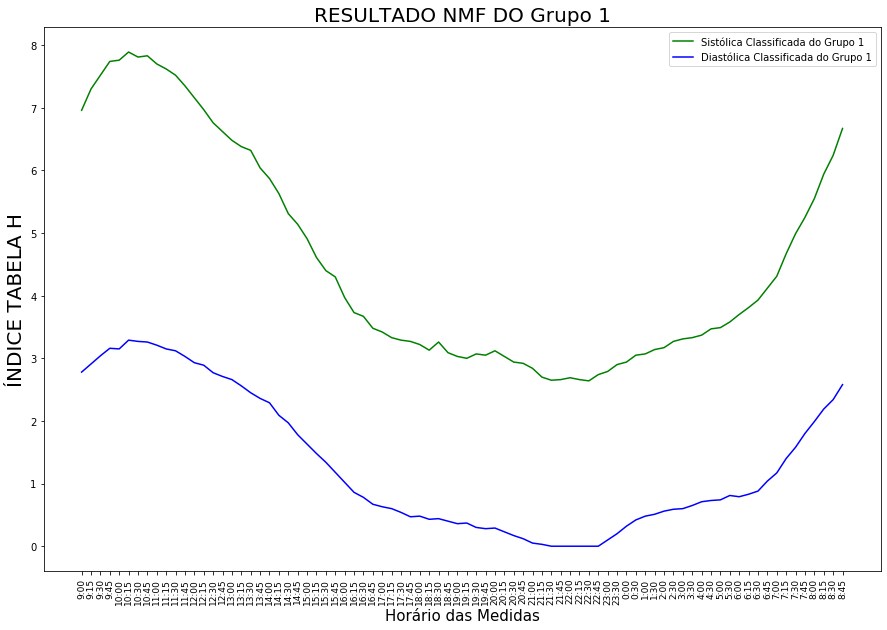

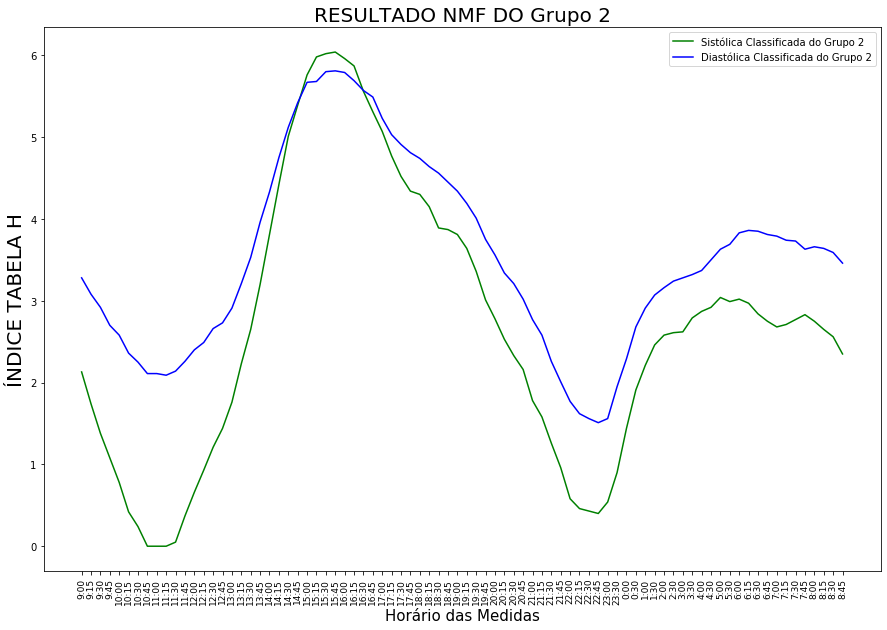

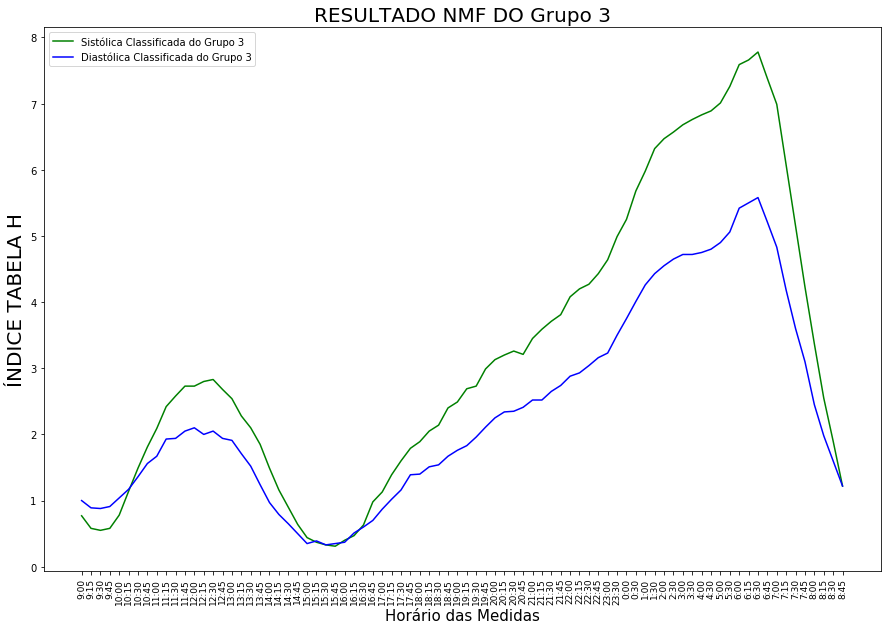

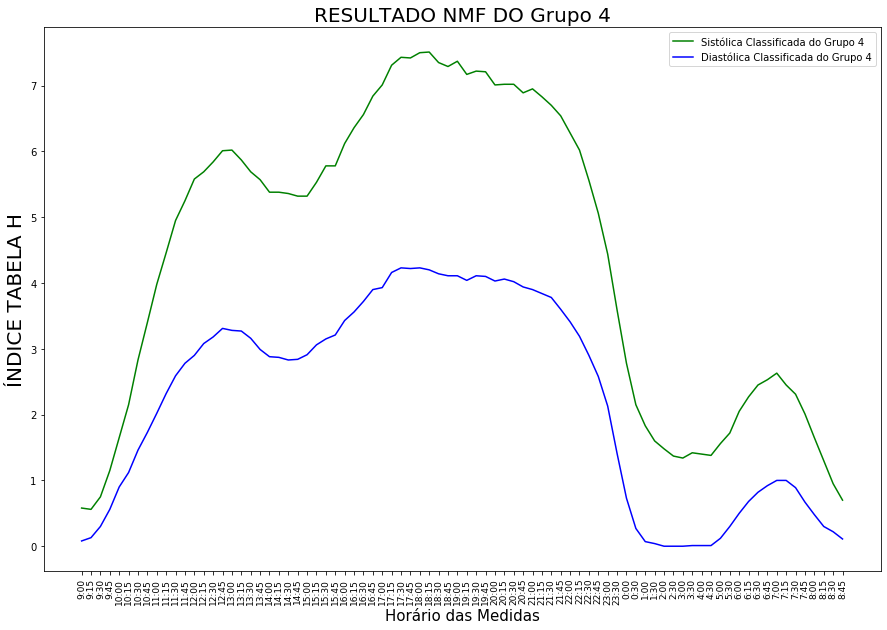

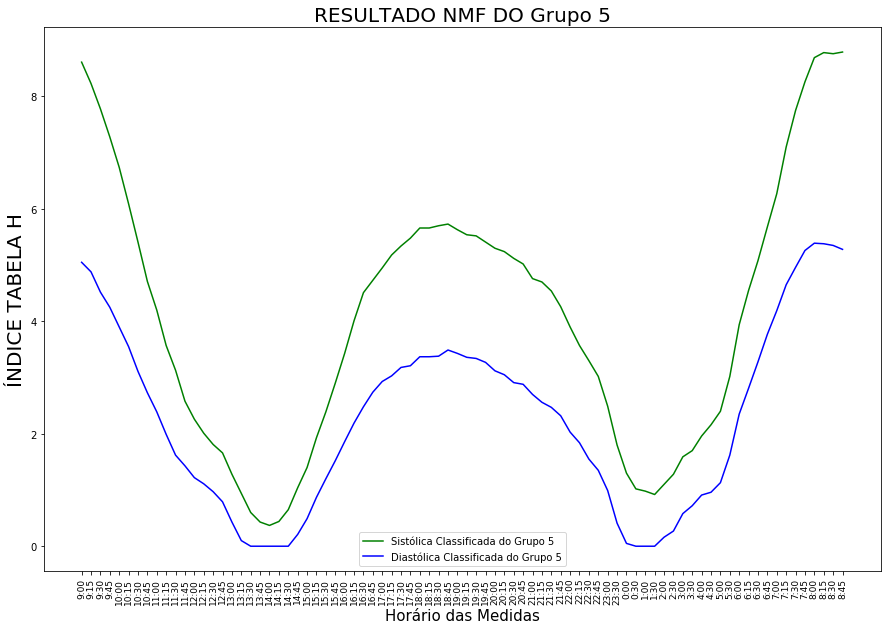

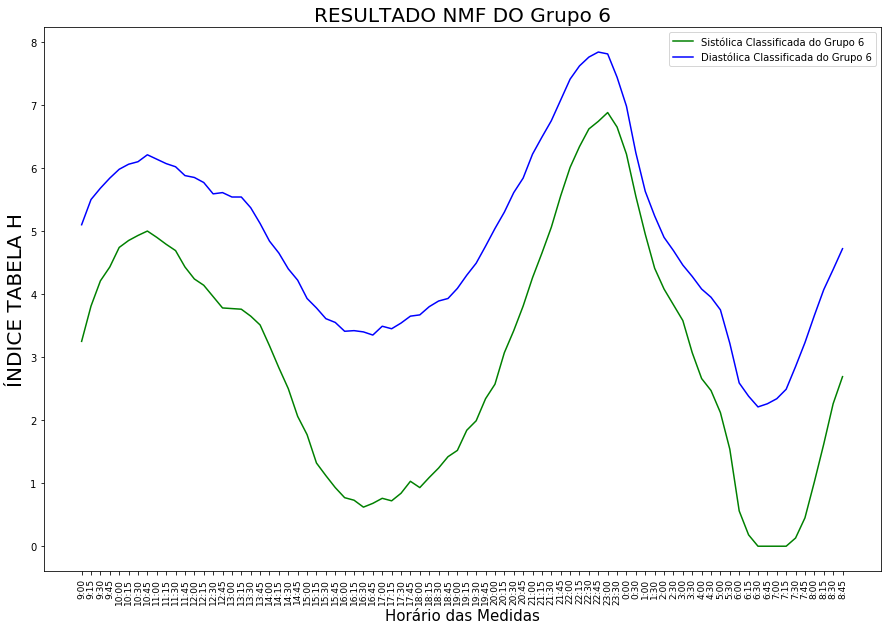

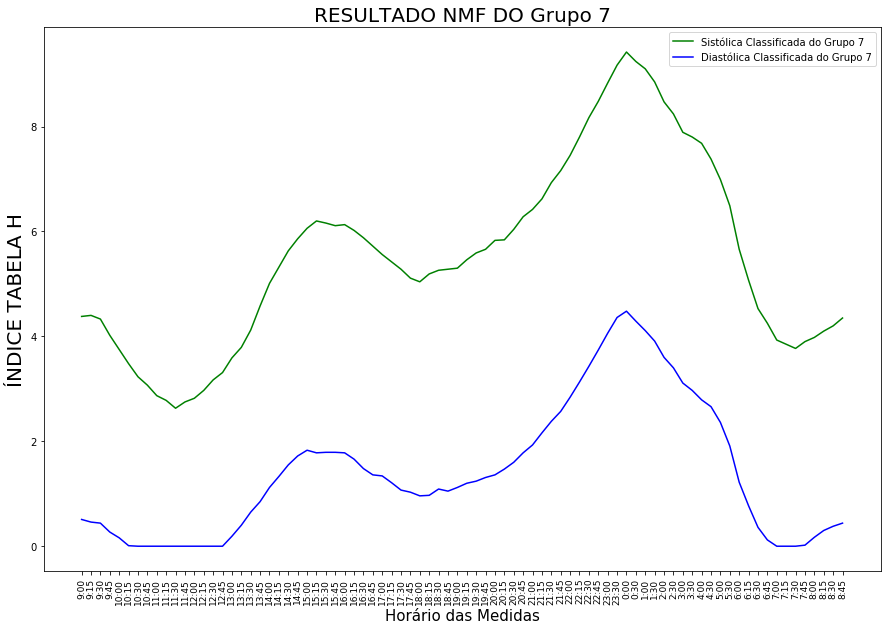

In [79]:
#      Plota os gráficos de cada grupo resultado do NMF

#   Transpose apenas para facilitar a montagem do grafico. As colunas se tornam linhas e vice-versa
#df = pd.read_csv(DIR_NMF / "H.csv", delimiter=';', index_col=0).T

df = H.T
# prepara os dados para filtrar o que é Sistólica e o que é Diastólica
df['is_sist'] = ['sist' in i for i in df.index.values]
df['is_diast'] = ['diast' in i for i in df.index.values]

# divisão dos dados em Sistólica e Diastólica, respectivamente
df_sist = df[df['is_sist'] == True]
df_sist = df_sist.drop(columns=['is_sist', 'is_diast'])
# adiciona coluna apenas com o conteúdo do horário (sem a palavra sist/diast)
df_sist['sist_index'] = [i.replace('sist ', '') for i in df_sist.index.values]
# grava a 1a. coluna apenas com o horário
df_sist.set_index('sist_index', inplace=True)
print (df_sist)

df_diast = df[df['is_diast'] == True]
df_diast = df_diast.drop(columns=['is_sist', 'is_diast'])
df_diast['diast_index'] = [i.replace('sist ', '') for i in df_diast.index.values]
df_diast.set_index('diast_index', inplace=True)

# Plota os gráficos de cada grupo gerado pela tabela H que é a saída do NMF
# Grava cada gráfico em formato SVG

for grupo in df_sist.columns:
    f = plt.figure(figsize=(15, 10))

    # plota os pontos da sistólica em cada grupo
    y_sist = df_sist[grupo]
    # horários das medidas que serão os xticks
    x_sist = df_sist.index

    # Legenda da Sistólica
    plt.plot(x_sist, y_sist, color='green', label='Sistólica Classificada do '+str(grupo))
    
    # plota os pontos da diastólica em cada grupo baseado no eixo X = horários e eixo Y = números da matriz 
    y_diast = df_diast[grupo]

    # Legenda da Diastólica
    plt.plot(x_sist, y_diast, color='blue', label='Diastólica Classificada do '+str(grupo))
    plt.xticks(rotation=90, fontsize=9)


    plt.title('RESULTADO NMF DO '+str(grupo), fontsize=20)
    plt.xlabel('Horário das Medidas', fontsize=15)
    plt.ylabel('ÍNDICE TABELA H', fontsize=20)
    #plt.ylabel(grupo, fontsize=20)
    plt.legend()
    # Plota gráficos da tabela H em cada grupo 
    #plt.savefig(r"C:\Users\marta\projeto_pa\NMF\NMF_classificado_{}".format(grupo),format="svg")
    plt.savefig(DIR_NMF / f'NMF_classificado_{grupo}.svg',format="svg")
    #plt.savefig(DIR_NMF / 'NMF_classificado_'+str(grupo)+'.svg',format="svg")
    plt.show()


## Identificar as variaveis mais importantes para definir os Grupos de Pacientes (Random)

In [80]:
#importando a biblioteca
from sklearn.ensemble import RandomForestClassifier

In [81]:
#parametizando o random
random_forest = RandomForestClassifier(n_estimators=50)

In [82]:
#treino
random_forest.fit(dados_sem_id,valores_relevancia_grupo['grupo'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
#cálculo da importância (com 3 casas decimais) de cada variável para identificar os grupos 
importances = pd.DataFrame({'feature':dados_sem_id.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [84]:
#tabela com o grau de importancia de cada variavel(da mais importante pra menos) para separação dos grupos 

importances.to_csv(DIRETORIO_PRINCIPAL / "NMF" /  "importancia_variaveis.csv", 
                   sep=";", encoding="latin1", index=True)
importances

,importance
feature,
sist 11:30,0.015
sist 11:15,0.015
sist 10:30,0.014
sist 10:45,0.014
sist 11:45,0.014
...,...
sist 7:45,0.004
sist 8:00,0.004
sist 8:30,0.004


In [85]:
estatistica

#parametizando o random
random_forest_estatistica = RandomForestClassifier(n_estimators=100)

#treino
random_forest_estatistica.fit(estatistica_sem_id,valores_relevancia_grupo_estatistica['grupo'])

#cálculo da importância (com 3 casas decimais) de cada variável para identificar os grupos 
importances_estatistica = pd.DataFrame({'feature':estatistica_sem_id.columns,'importance':np.round(random_forest_estatistica.feature_importances_,3)})
importances_estatistica = importances_estatistica.sort_values('importance',ascending=False).set_index('feature')

importances_estatistica

,importance
feature,
AUC PP Daytime,0.574
AUC Diastolica em 24h,0.224
AUC PP Nighttime,0.121
AUC Sistolica em 24h,0.080
